# COSC 3337 - Practice 8 - Ridge and Lasso - Ujwal Joshi

### Regularization
Regularization is an important concept that is used to avoid overfitting of the data, especially when the trained and test data are varying much.  

Regularization is implemented by adding a “penalty” term to the best fit derived from the trained data, to achieve a lesser variance with the tested data and also restricts the influence of predictor variables over the output variable by compressing their coefficients.  

In regularization, what we do is normally we keep the same number of features but reduce the magnitude of the coefficients. We can reduce the magnitude of the coefficients by using different types of regression techniques which uses regularization to overcome this problem. So, let us discuss them.  

### About The Data
For this lab, we'll be revisiting the lab 4 housing dataset and comparing the below regression techniques:
- Linear Regression
- Ridge Regression
- Lasso Regression

The dataset that we'll be using for this task comes from [kaggle.com](https://www.kaggle.com/datasets/vedavyasv/usa-housing) and contains the following attributes:

- 'Avg. Area Income': Avg. income of residents of the city house is located in.
- 'Avg. Area House Age': Avg age of houses in same city
- 'Avg. Area Number of Rooms': Avg number of rooms for houses in same city
- 'Avg. Area Number of Bedrooms': Avg number of bedrooms for houses in same city
- 'Area Population': Population of city house is located in
- 'Price': Price that the house sold at ***(target)***
- 'Address': Address for the house

### Exploratory Data Analysis
Let's begin by importing some necessary libraries that we'll be using to explore the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Our first step is to load the data into a pandas DataFrame

In [3]:
housing_data = pd.read_csv('USA_Housing.csv')
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [4]:
# Modified Work
housing_data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\r\nEast Holly, NV..."


From here, it's always a good step to use `describe()` and `info()` to get a better sense of the data and see if we have any missing values.

In [5]:
housing_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
# Modified Work
unique_vals_housing_data = pd.DataFrame({
    'Unique Value Count': housing_data.apply(lambda col: len(col.unique())),
    'Unique Values': housing_data.apply(lambda col: col.unique())
})

unique_vals_housing_data

,Unique Value Count,Unique Values
Avg. Area Income,5000,"[79545.45857431678, 79248.64245482568, 61287.0..."
Avg. Area House Age,5000,"[5.682861321615587, 6.0028998082752425, 5.8658..."
Avg. Area Number of Rooms,5000,"[7.009188142792237, 6.730821019094919, 8.51272..."
Avg. Area Number of Bedrooms,255,"[4.09, 3.09, 5.13, 3.26, 4.23, 4.04, 3.41, 2.4..."
Area Population,5000,"[23086.800502686456, 40173.07217364482, 36882...."
Price,5000,"[1059033.5578701235, 1505890.91484695, 1058987..."
Address,5000,"[208 Michael Ferry Apt. 674\r\nLaurabury, NE 3..."


The info below lets us know that we have 5,000 entries and 5,000 non-null values in each feature/column. Therefore, there are no missing values in this dataset.

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
# Modified Work
housing_data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

A quick pairplot lets us get an idea of the distributions and relationships in our dataset. From here, we could choose any interesting features that we'd like to later explore in greater depth. ***Warning: The more features in our dataset, the harder our pairplot will be to interpret.***

c:\Users\Ujwal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


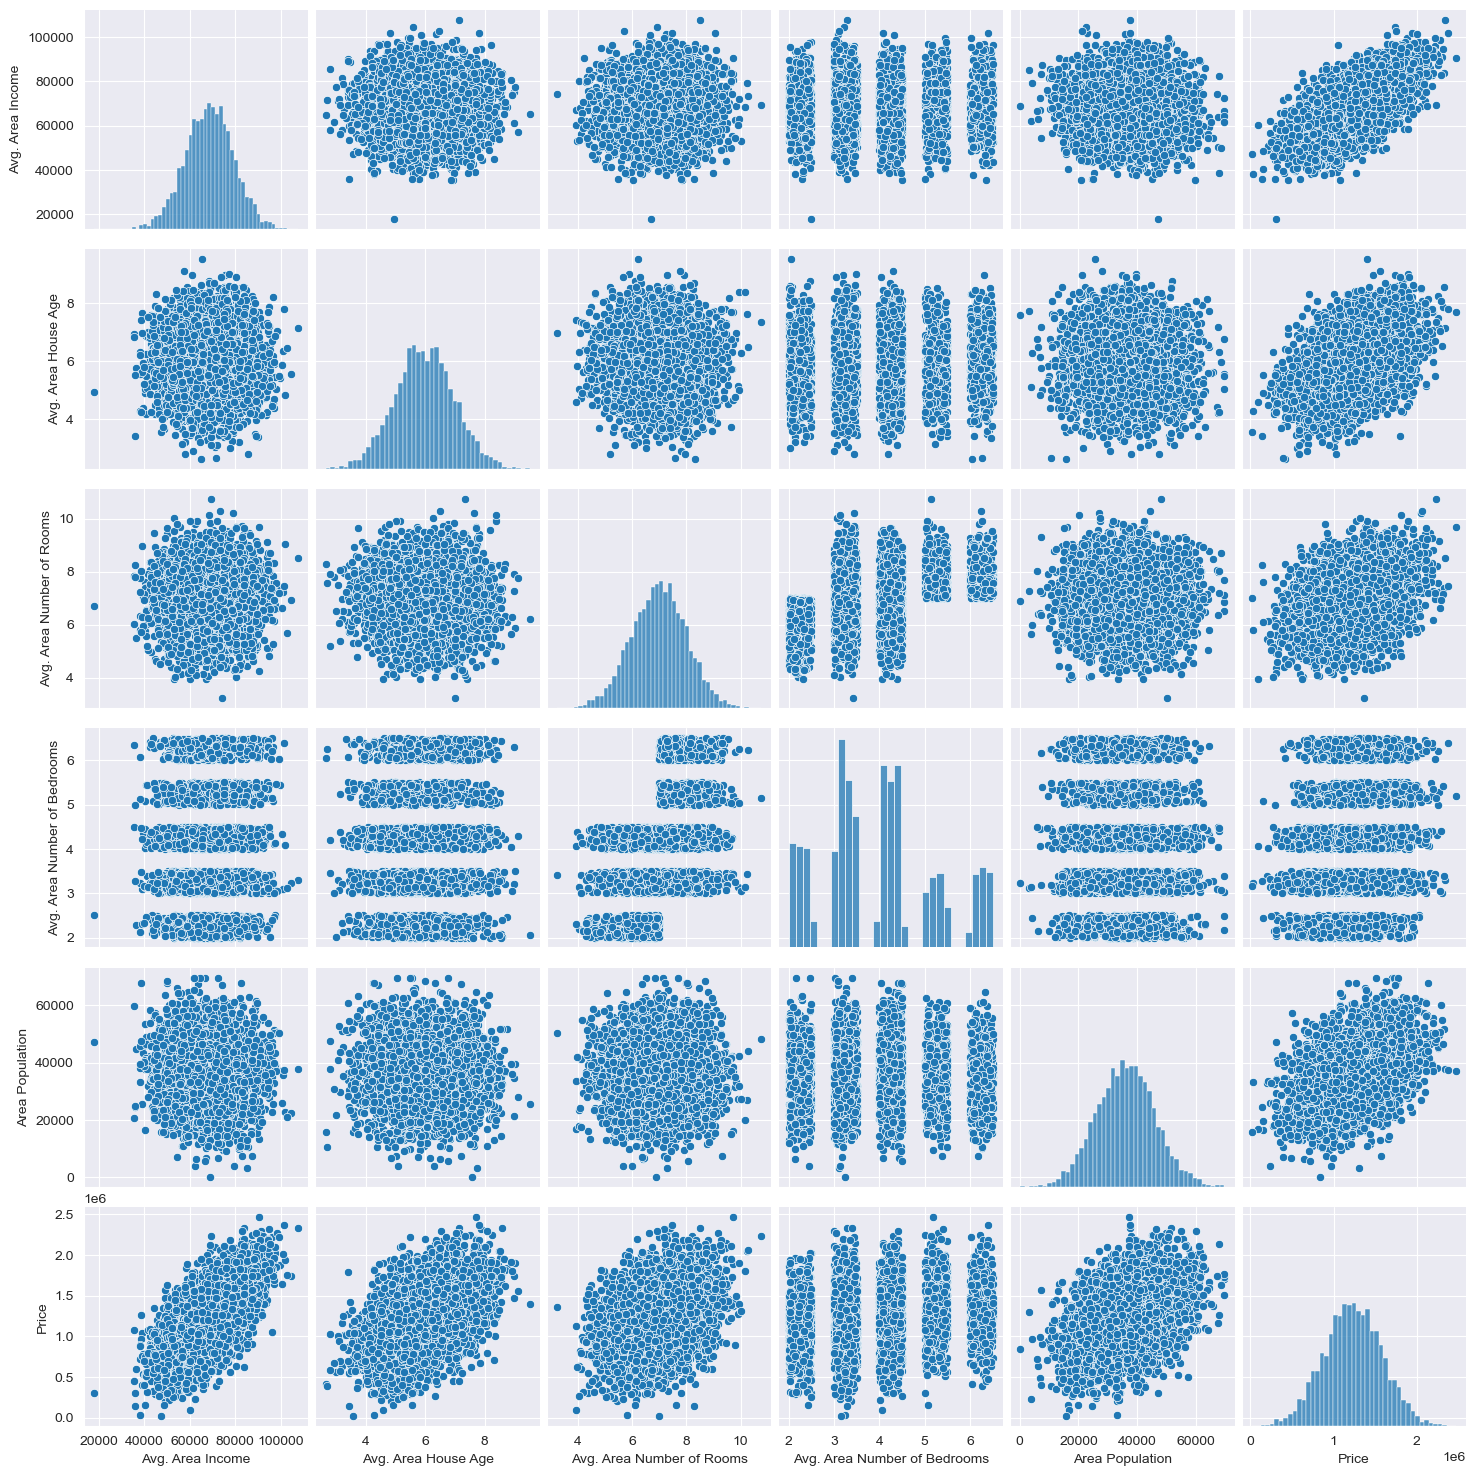

In [9]:
sns.pairplot(housing_data)
plt.show()

Taking a closer look at price, we see that it's normally distributed with a peak around 1.232073e+06, and 75% of houses sold were at a price of 1.471210e+06 or lower.

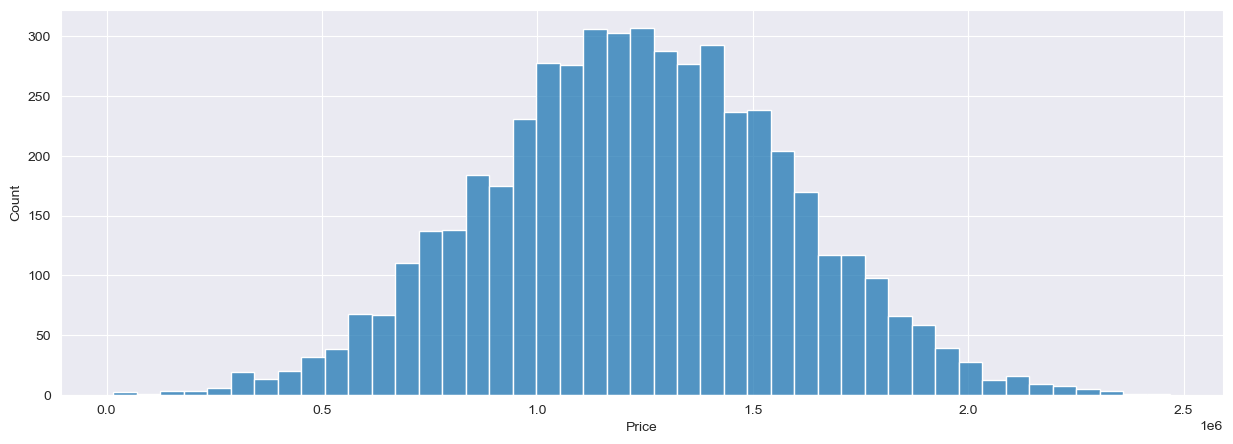

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64


In [10]:
sns.histplot(housing_data['Price'])
plt.show()
print(housing_data['Price'].describe())

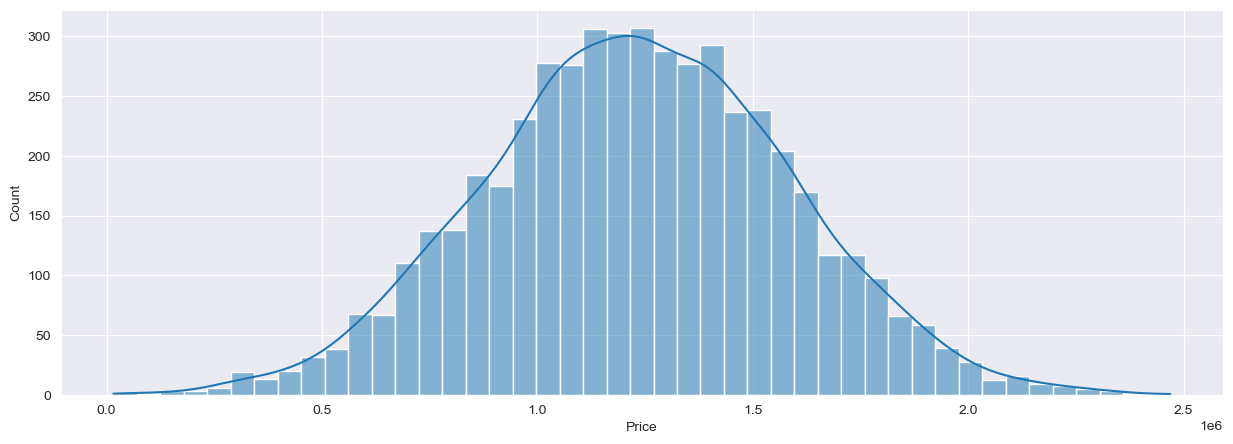

In [11]:
# Modified Work
sns.histplot(housing_data['Price'], kde=True)
plt.show()

A scatterplot of Price vs. Avg. Area Income shows a strong positive linear relationship between the two.

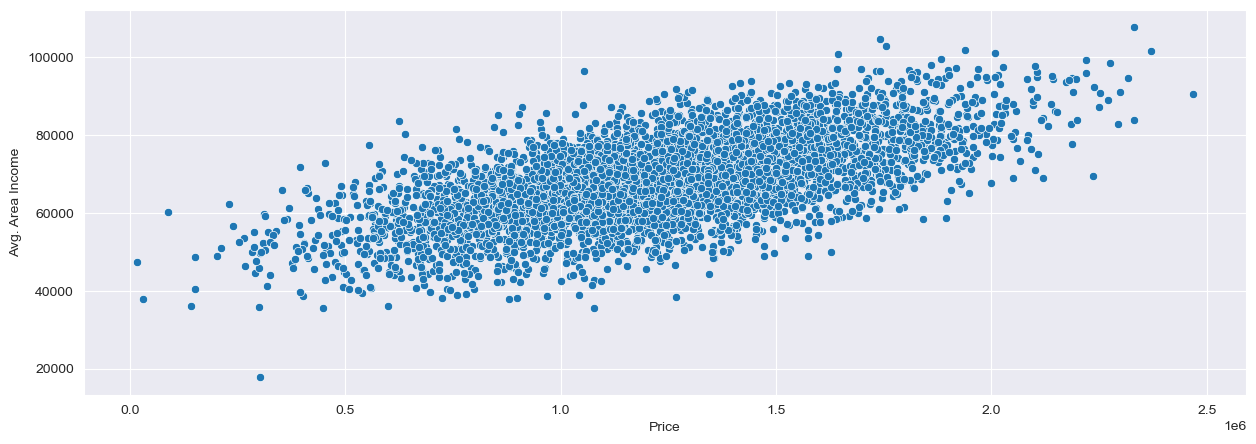

In [12]:
sns.scatterplot(x='Price', y='Avg. Area Income', data=housing_data)
plt.show()

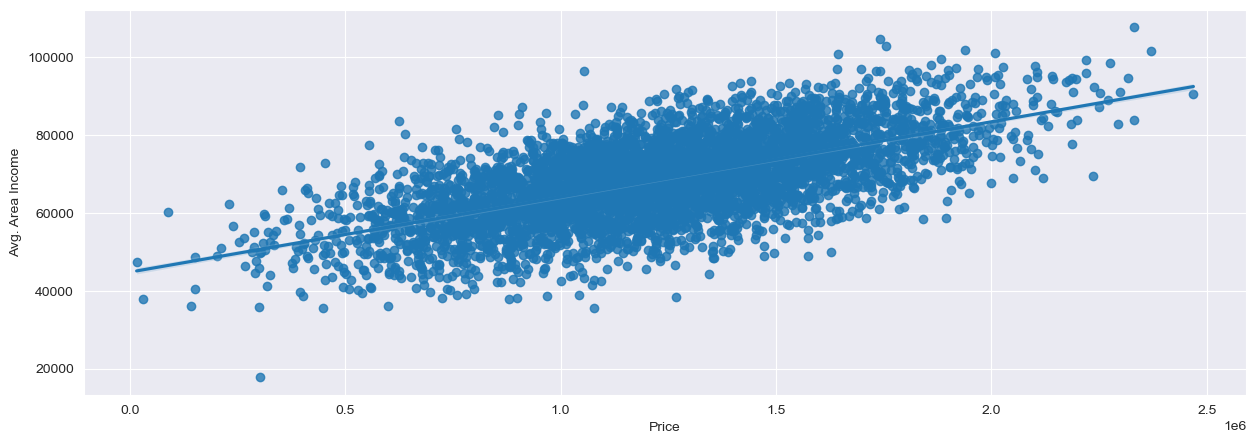

In [13]:
# Modified Work
sns.regplot(x='Price', y='Avg. Area Income', data=housing_data)
plt.show()

Creating a boxplot of Avg. Area Number of Bedrooms lets us see that the median average area number of bedrooms is around 4, with a minimum of 2 and max of around 6.5. We can also so that there are no outliers present.

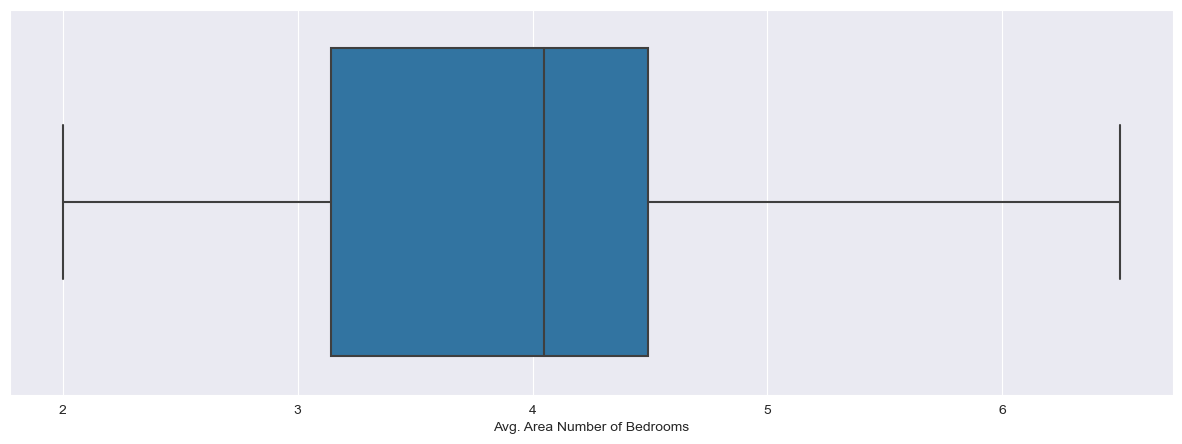

In [14]:
sns.boxplot(x='Avg. Area Number of Bedrooms', data=housing_data)
plt.show()

Try plotting some of the other features for yourself to see if you can discover some interesting findings. Refer back to the matplotlib lab if you're having trouble creating any graphs.

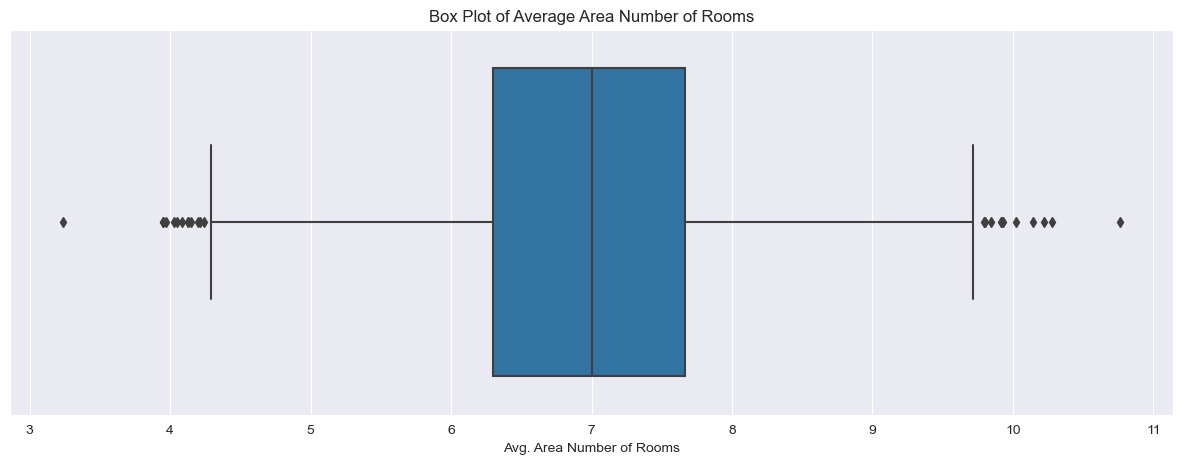

In [15]:
# Modified Work
sns.boxplot(x='Avg. Area Number of Rooms', data=housing_data)
plt.title('Box Plot of Average Area Number of Rooms')
plt.show()

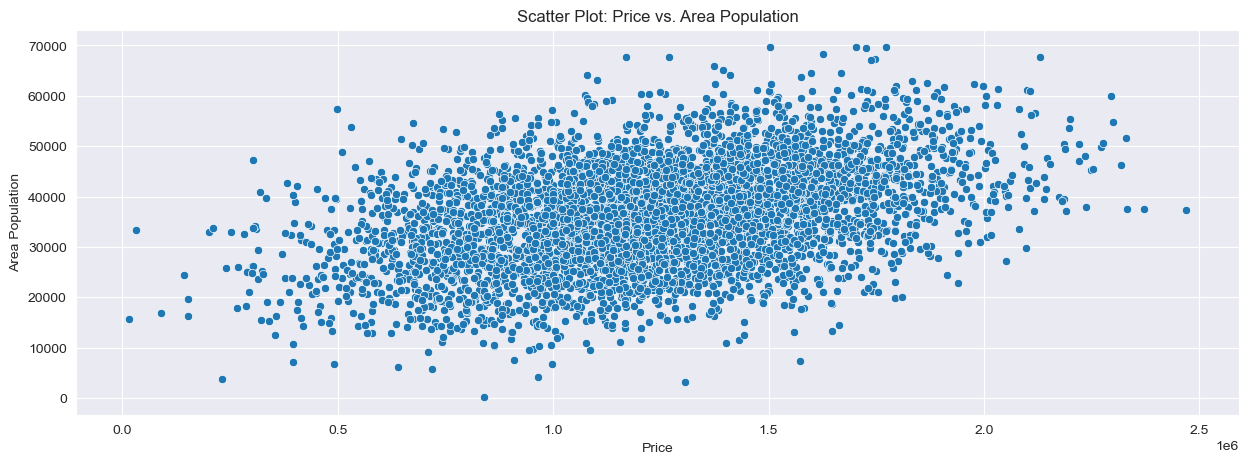

In [17]:
sns.scatterplot(x='Price', y='Area Population', data=housing_data)
plt.title("Scatter Plot: Price vs. Area Population")
plt.show()

Another important thing to look for while we're exploring our data is multicollinearity. Multicollinearity means that several variables are essentially measuring the same thing. Not only is there no point to having more than one measure of the same thing in a model, but doing so can actually cause our model results to fluctuate. Luckily, checking for multicollinearity can be done easily with the help of a heatmap. ***Note: Depending on the situation, it may not be a problem for your model if only slight or moderate collinearity issue occur. However, it is strongly advised to solve the issue if severe collinearity issue exists(e.g. correlation >0.8 between 2 variables)***

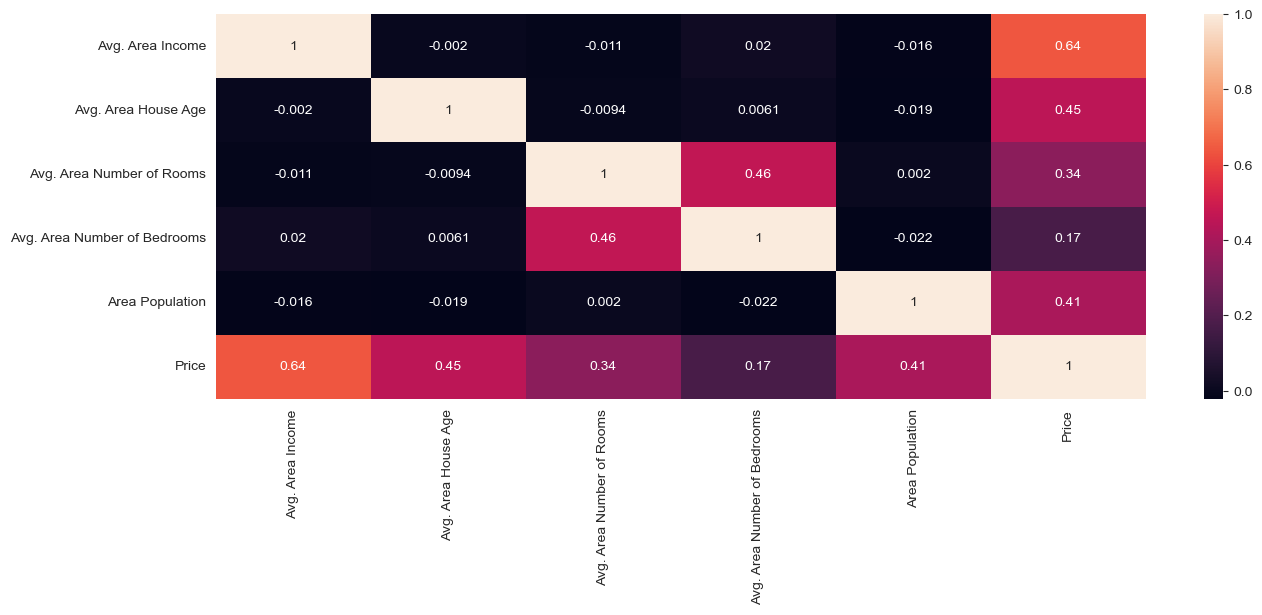

In [19]:
sns.heatmap(housing_data.drop(columns=['Address']).corr(), annot=True)
plt.show()

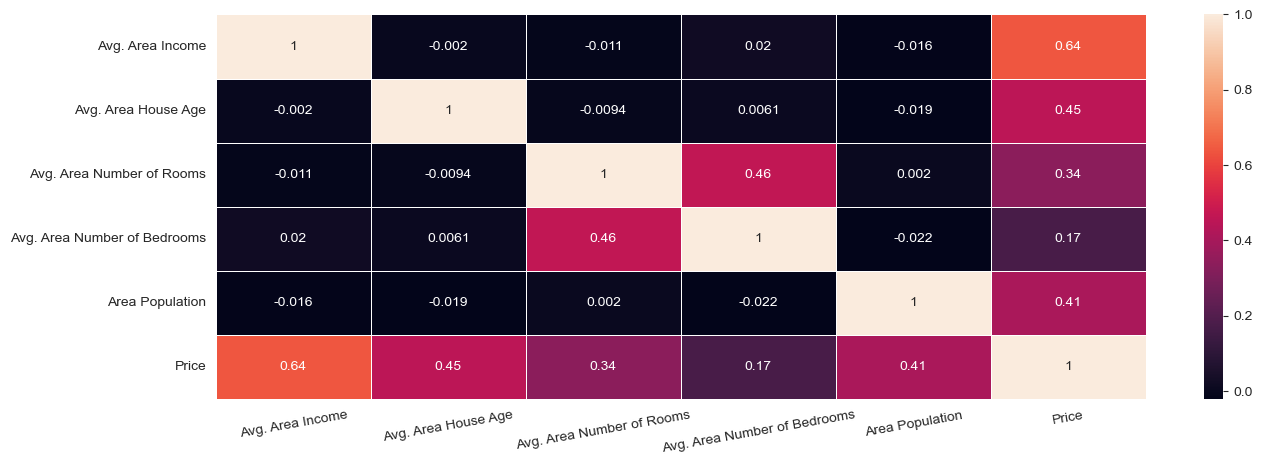

In [24]:
# Modified Work
sns.heatmap(housing_data.drop(columns=['Address']).corr(), annot=True, linewidth=.5)
plt.xticks(rotation=10)
plt.show()

No severe collinearity issues.

### Train Test Split
We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be done using sklearn's `train_test_split(X, y, test_size)` function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [25]:
from sklearn.model_selection import train_test_split

X = housing_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = housing_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Metrics
For the following models, we'll take a look at some of the following metrics:  

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
$$\frac{1}{n}\sum\limits^{n}_{i=1}|y_i-\hat{y}_i|$$  

**Mean Squared Error (MSE)** is the mean of the squared errors:
$$\frac{1}{n}\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)$$  

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n}\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)}$$  

Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.  

All of these are **loss functions**, because we want to minimize them.  

Luckily, sklearn can calculate all of these metrics for us. All we need to do is pass the true labels (y_test) and our predictions to the functions below. What's more important is that we understand what each of these means. Root Mean Square Error (RMSE) is what we'll most commonly use, which is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells us how concentrated the data is around the line of best fit. Determining a good RMSE depends on your data. You can find a great example [here](https://stackoverflow.com/questions/57348495/what-is-the-good-rmse-root-mean-square-error-value-range-to-justify-the-effici), or refer back to the power points.  

Something we also like to look at is the coefficient of determination ($R^2$), which is the percentage of variation in y explained by all the x variables together. Usually an ($R^2$) of .70 is considered good.

### Linear Regression
We'll now import sklearn's LinearRegression model and begin training it using the `fit(train_data, train_data_labels)` method. In a nutshell, fitting is equal to training. Then, after it is trained, the model can be used to make predictions, usually with a `predict(test_data)` method call. You can think of fit as the step that finds the coefficients for the equation.

In [26]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

# pass our X_test data through the model (lm) to get our predictions
predictions = lm.predict(X_test)

In [27]:
from sklearn import metrics
from sklearn.metrics import r2_score

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: ', r2_score(y_test, predictions))

MAE: 80283.82297870348
MSE: 10011802235.601444
RMSE: 100058.99377667879
R2 Score:  0.9185523571026029


### Ridge Regression
Ridge Regression is a technique for analyzing multiple regression data that suffers from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors. It is hoped that the net effect will be to give estimates that are more reliable.

In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.05)
ridge.fit(X_train, y_train)

predictions_ridge = ridge.predict(X_test)

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge)))
print('R2 Score: ', r2_score(y_test, predictions_ridge))

MAE: 80283.89932062344
MSE: 10011827171.88898
RMSE: 100059.11838452796
R2 Score:  0.9185521542418396


In [33]:
# Modified Work
ridge2 = Ridge(alpha = 10, random_state=42, solver='cholesky')
ridge2.fit(X_train, y_train)

predictions_ridge2 = ridge2.predict(X_test)

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ridge2))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ridge2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge2)))
print('R2 Score: ', r2_score(y_test, predictions_ridge2))

MAE: 80299.66072304551
MSE: 10017127705.27328
RMSE: 100085.6018879503
R2 Score:  0.9185090335388841


### Lasso Regression
The “LASSO” stands for Least Absolute Shrinkage and Selection Operator. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

The key difference to remember here is that Lasso shrinks the less important feature’s coefficient to zero, thus removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.05)
lasso.fit(X_train, y_train)

predictions_lasso = lasso.predict(X_test)

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lasso))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lasso)))
print('R2 Score: ', r2_score(y_test, predictions_lasso))

MAE: 80283.82472747673
MSE: 10011802835.655746
RMSE: 100058.99677518132
R2 Score:  0.9185523522210632


In [38]:
# Modified Work
lasso2 = Lasso(alpha = 0.05, precompute=True, selection='random', warm_start=True)
lasso2.fit(X_train, y_train)

predictions_lasso2 = lasso2.predict(X_test)

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lasso2))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lasso2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lasso2)))
print('R2 Score: ', r2_score(y_test, predictions_lasso2))

MAE: 80283.8249353578
MSE: 10011802896.296726
RMSE: 100058.99707820745
R2 Score:  0.918552351727739


Congrats! 🙂 you now know how to create ridge and lasso models using sklearn and different available metrics. However, it's more important that you know when it's appropriate to use these models. For more detail, please refer back to the lecture video and or slides.